# Tests with different learning ratio

In [1]:
%load_ext autoreload
%autoreload 2
from bandits import LinUCB, Ucb1, Egreedy
from evaluator import evaluate
from matplotlib import pyplot as plt


import pandas as pd

In [2]:
%%time
import dataset
files = ("dataset/R6/ydata-fp-td-clicks-v1_0.20090502","dataset/R6/ydata-fp-td-clicks-v1_0.20090503")
dataset.get_yahoo_events(files)

7646058 events with 62 articles
Wall time: 6min 35s


In [3]:
_, deploy = evaluate(Egreedy(1))
rnd_ctr = deploy[-1]

Egreedy (ε=1)       0.0311    1.2m


Egreedy (ε=0.1)     0.0412    59.4s
Egreedy (ε=0.1)     0.0401    1.1m
Egreedy (ε=0.1)     0.0402    1.1m
Egreedy (ε=0.1)     0.044     1.2m


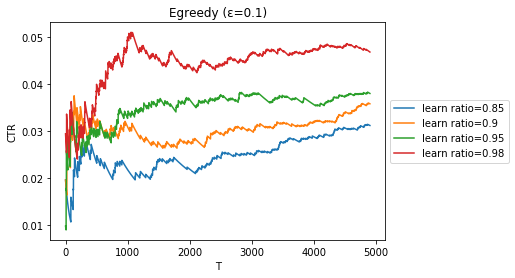

UCB1 (α=0.1)        0.0437    2.3m
UCB1 (α=0.1)        0.044     2.0m
UCB1 (α=0.1)        0.0427    2.1m
UCB1 (α=0.1)        0.0445    2.1m


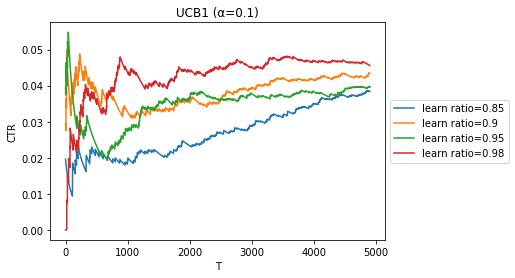

LinUCB (α=0.1)      0.0473    18.6m
LinUCB (α=0.1)      0.0507    18.7m
LinUCB (α=0.1)      0.0489    17.7m
LinUCB (α=0.1)      0.0458    16.7m


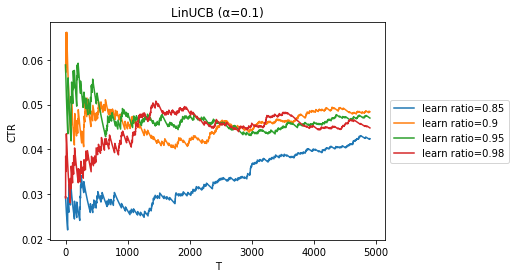

In [6]:
ratio = [0.85,0.9,0.95,0.98]
results = [['Ratio','Bucket','Algorithm','CTR Lift']]

algorithms = [Egreedy(0.1),Ucb1(0.1),LinUCB(0.1)]

for test in algorithms:
    for r in ratio:
        learn ,deploy = evaluate(test,size=100,learn_ratio=r)
        results.append([r,'learn',test.algorithm, learn[-1]/rnd_ctr])
        results.append([r,'deploy',test.algorithm, deploy[-1]/rnd_ctr])
        
        plt.plot(deploy[100:5000], label="learn ratio={}".format(r))
        
    plt.title(test.algorithm)
    plt.xlabel("T")
    plt.ylabel("CTR")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()